In [996]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

***
***
# Creating an ANN model
## Will be using a non-linear variation of this simple **regression** equation:
$y_i = \beta _0 + \beta _1x_i + \epsilon _i$

Variables:
- $y_i$ is an $i^{th}$ data value. Dependent on $x_i$.
- $\beta _0$ is the *intercept* 

- $\beta _1x_i$ coefficient of (weights $\cdot$ x), weighted input values, "slope" of line. $x_i$ is the INDEPENDENT variable, aka $IV$

- $\epsilon _i$ the $i^{th}$ error (residual). Difference between *predicted* and *actual* values.

##### **Vocabulary**
- **Regression analysis**: A statistical procedure used to predict data values based on other variables.
- **Simple regression**: A type of regression analysis that predicts a continuous variable based on another variable.
- **Residual term** ($\epsilon$): (another term for error) The difference between the predicted values and the actual observed values in a regression model.
- **Perceptron**: A type of artificial neural network unit that takes inputs and computes a weighted linear sum of those inputs, which then passes through a non-linear activation function.
- **Prediction**: The model's output or estimate of the world.
- **Error**: The difference between the model's prediction and the actual value.
- **Loss function**: A function that quantifies the error between the model's prediction and the actual value.
- **Mean squared error (MSE)**: A loss function used for *continuous data* that computes the squared difference between the model's prediction and the actual value. 
- **Forward propagation** is the process of transforming input data into output in deep learning.
- **Back propagation**: The topic of the next video, which involves updating the weights of a deep learning model by propagating the errors backward through the network.

***
### Creating a data set

<function matplotlib.pyplot.show(close=None, block=None)>

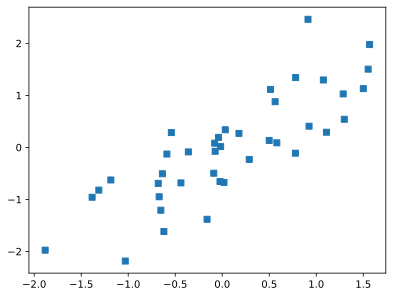

In [997]:
N = 40

# set of random x and y values
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2 # neater y dataset

#y = x + torch.randn(N,1)/torch.randn(1) # scattered y dataset
#y = 2*x # linear y dataset

# plot
plt.plot (x,y, 's')
plt.show

***
### Building the ANN model
**This model will have three layers.**
1. linear layer, handles inputs.
2. non-linear activation function layer.
2. linear layer, handles outputs. Will be $\hat y$, the final prediction from the model.

This first model will be given an **x** value, and will try to **predict the value of y**.

**syntax**<br>
`nn.Sequential` : the object that contains the model, a sequential function. Inputs for the function will be the three layers.<br>
`nn.Linear(1,1)`: creates a linear unit, the first parameter is the number of inputs, the second parameter is the number of outputs.<br>
`nn.ReLU()`: "rectified linear unit", the nonlinear activation function

**loss, error, optimizers**
Loss function $MSE\space or \space L = \dfrac{1}{2} \cdot(\hat y - y)^2$,
<br>where $\hat y$ is the predicted value from the model
<br>and y is the real / true value of y from the dataset.
- The loss function will be MSE (mean squared error). Computes the average of the squared differences between predicted and observed values.
    - Each loss value will be stored in the variable `losses`
- Optimizer - will be the type of gradient descent algorithm used. In this case it is SGD (Stochastic Gradient Descent).

In [998]:
ANN_reg = nn.Sequential(
    nn.Linear(1,1), # input
    nn.ReLU(), # activation
    nn.Linear(1,1) # output
)

#ANN_reg

In [999]:
# parameters

learning_rate = 0.05

loss_func = nn.MSELoss() # mean squared error function

optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=learning_rate) # type of gradient descent used

In [1000]:
# training model parameters

epochs = 100
losses = torch.zeros(epochs) # initializing with empty vector

In [1001]:
# training

for epoch_IDX in range(epochs):
    # forward pass (passing dataset inputs into model), storing predicted output in y_hat
    y_hat = ANN_reg(x)

    # calculating loss
    loss = loss_func(y_hat, y) # loss calculated per value using MSE
    losses[epoch_IDX] = loss # storing loss value

    # backprop (adjusting weights to minimize error)
    optimizer.zero_grad() # re-initialize gradient to 0
    loss.backward() # implements backprop
    optimizer.step()

***
#### Plotting the training results

**Syntax**<br>
`.detach()` is used because `test_loss` is a tensor object that includes more than just the number. `.detach()` gets rid of extraneous info that is not the number.<br>
`.item()` serves a similar purpose, where it only get the number stored in a tensor object. Does not get rid of information.

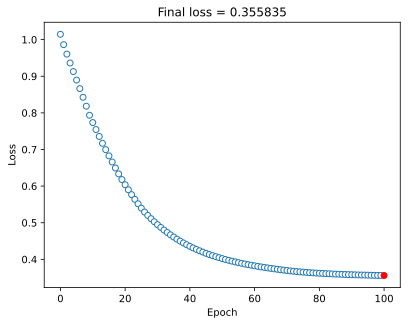

In [1002]:
# manual loss computation for graphing
predictions = ANN_reg(x)

# final loss with MSE
test_loss = (predictions-y).pow(2).mean()

# plots
plt.plot(losses.detach(), 'o', markerfacecolor ='w', linewidth=0.1)
plt.plot(epochs, test_loss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %test_loss.item())
plt.show()

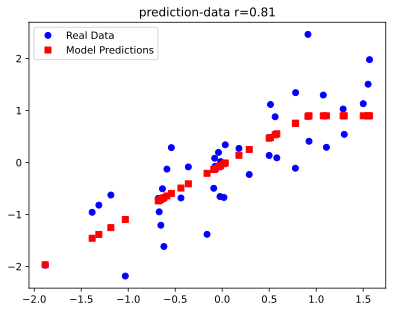

In [1003]:
# Plotting x dataset and predicted x values

plt.plot(x,y, 'bo', label='Real Data')
plt.plot(x,predictions.detach(), 'rs', label='Model Predictions')

plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

## Trends
**Tried changing y values to be more scattered**
1. I think this type of model works better with data that is more correlative, or data the follows a trend.
2. When the y values are more randomly varied and spread out, this type of model really struggles to predict.
3. The model will likely not be able to predict values of y that greatly vary from the general dataset. Some of these points honestly look like outliers.

**Tried changing y values to 2*x**
1. Almost a perfectly linear trend with the random data. Interesting to see that the model has a sort of "fall off" range of accuracy. Some of the extreme data points farthest to the left or right of the graph can be completely missed by the model. The predicted values of y flattens off at a certain value.
2. I'm not sure what is causing this. But it happens with almost every run.
3. It almost looks like there is an asymptote either above or below the model.
4. It is important to note that with a lot of the random data sets the real y values are either really high or really low.

**Added more data points to y = 2x**
1. With adding more data points, there is clearly an asymptote that shows up with the predicted y values.
2. This is an interesting limitation. I'll try adding more epochs?
3. After adding more epochs, the amount of points that hit the asymptote are reduced, but it does not get rid of this problem. The model is probably over-fitted now with too many epochs too.<br>

**My thoughts** - since these are random data sets, portions of the data are really scattered and might not have much of a correlation compared to the rest of the set, so that is why there is the horizontal line. This model tends to get stuck on the last y value / prediction if the data doesn't follow a more linear trend. 